import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# Customer Segmentation using Clustering

## Data

The final dataset used for the inferential statistics project includes unique ICU admission of 46,234 patients’ demographic (age), vital (blood pressure, heart rate, body temperature, and Glasgow Comma Scale), underlying conditions (HIV, metastatic cancer, and hematologic malignancy), admission type (scheduled surgical, medical, or unscheduled surgical), renal (urinary output, and Blood Urea Nitrogen), and others (serum bicarbonate level, sodium level, potassium level, and bilirubin level) data. This dataset is build based on the commonly used mortality prediction tool, Simplified Acute Physiology Score II (SAPSII). 

In [1]:
os.getcwd()

<IPython.core.display.Javascript object>

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\Machine Learning'

In [2]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")
saps = pd.read_csv("saps_ts.csv", header=0, index_col=0)
saps.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,0,0,268,110404,280836,3.2490,1,1,8,0.0,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.0,82.0
1,1,1,269,106296,206613,3.2788,0,0,8,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,37.0
2,2,2,270,188028,220345,2.8939,0,0,0,0.0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.0,45.0
3,3,3,271,173727,249196,2.0600,0,0,8,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,24.0
4,4,4,272,164716,210407,1.6202,0,0,8,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0


In [3]:
saps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61117 entries, 0 to 61116
Data columns (total 24 columns):
Unnamed: 0.1      61117 non-null int64
Unnamed: 0.1.1    61117 non-null int64
SUBJECT_ID        61117 non-null int64
HADM_ID           61117 non-null int64
ICUSTAY_ID        61117 non-null int64
los               61117 non-null float64
hdeath            61117 non-null int64
death             61117 non-null int64
admission         61117 non-null int64
ud                61117 non-null float64
bun               61117 non-null float64
Bicarbonate       61117 non-null float64
ventilation       61117 non-null float64
Potassium         61117 non-null float64
Sodium            61117 non-null float64
Temp              61117 non-null float64
Bilirubin         61117 non-null float64
WBC               61117 non-null float64
hr                61117 non-null float64
gcs               61117 non-null float64
bp                61117 non-null float64
AGE               61117 non-null float64
UO   

## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

In [4]:

sapsDummies = pd.get_dummies(saps, columns=['admission', 'ud', 'bun', 'Bicarbonate',
                                            'ventilation', 'Potassium', 'Sodium', 'Temp',
                                            'Bilirubin', 'WBC', 'hr', 'gcs','bp', 'AGE', 'UO']) 

<IPython.core.display.Javascript object>

In [5]:
sapsDummies

,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,saps2,admission_0,...,bp_2.0,bp_5.0,bp_13.0,AGE_0.0,AGE_7.0,AGE_12.0,AGE_15.0,AGE_16.0,AGE_18.0,UO_0.0
0,0,0,268,110404,280836,3.2490,1,1,82.0,0,...,0,0,1,0,0,1,0,0,0,1
1,1,1,269,106296,206613,3.2788,0,0,37.0,0,...,0,1,0,0,1,0,0,0,0,1
2,2,2,270,188028,220345,2.8939,0,0,45.0,1,...,0,0,1,0,0,0,0,0,1,1
3,3,3,271,173727,249196,2.0600,0,0,24.0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,4,272,164716,210407,1.6202,0,0,28.0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,61112,61112,94944,143774,201233,2.1894,0,0,74.0,0,...,0,0,1,0,0,0,0,1,0,1
61113,61113,61113,94950,123750,283653,2.4942,0,0,36.0,0,...,0,0,0,0,0,0,0,0,1,1
61114,61114,61114,94953,196881,241585,0.9259,0,1,28.0,1,...,0,1,0,0,1,0,0,0,0,1
61115,61115,61115,94954,118475,202802,2.3346,0,0,60.0,1,...,0,0,1,0,0,1,0,0,0,1


In [7]:
sapsDummies=sapsDummies.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)
sapsDummies

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,saps2,admission_0,admission_8,ud_0.0,...,bp_2.0,bp_5.0,bp_13.0,AGE_0.0,AGE_7.0,AGE_12.0,AGE_15.0,AGE_16.0,AGE_18.0,UO_0.0
0,268,110404,280836,3.2490,1,1,82.0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
1,269,106296,206613,3.2788,0,0,37.0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,270,188028,220345,2.8939,0,0,45.0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
3,271,173727,249196,2.0600,0,0,24.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,272,164716,210407,1.6202,0,0,28.0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,94944,143774,201233,2.1894,0,0,74.0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
61113,94950,123750,283653,2.4942,0,0,36.0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
61114,94953,196881,241585,0.9259,0,1,28.0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
61115,94954,118475,202802,2.3346,0,0,60.0,1,0,1,...,0,0,1,0,0,1,0,0,0,1


In [8]:
#sapsDummies.to_csv('sapsDummies.csv', header=0, index_col=0)

In [8]:
sapsDummies=sapsDummies.drop(['los', 'hdeath','death','SUBJECT_ID','HADM_ID', 'ICUSTAY_ID','saps2'], axis=1)

In [9]:
sapsDummies

,admission_0,admission_8,ud_0.0,ud_9.0,ud_10.0,ud_17.0,bun_0.0,bun_6.0,bun_10.0,Bicarbonate_0.0,...,bp_2.0,bp_5.0,bp_13.0,AGE_0.0,AGE_7.0,AGE_12.0,AGE_15.0,AGE_16.0,AGE_18.0,UO_0.0
0,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1
61113,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
61114,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
61115,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1


## K-Means Clustering

In K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

In [11]:
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

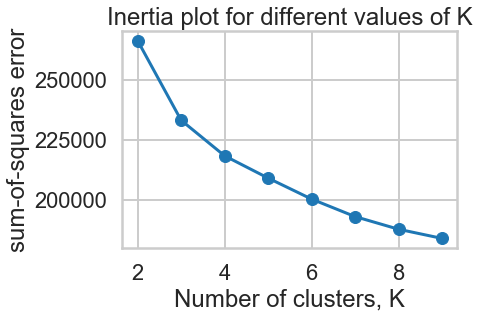

In [12]:
from sklearn.cluster import KMeans
import numpy as np

x_cols = sapsDummies.to_numpy()
inertia =[KMeans(n_clusters=k).fit(x_cols).inertia_ for k in range(2, 10)]

_=plt.plot(range(2,10), inertia, '-o')
_=plt.xlabel('Number of clusters, K')
_=plt.ylabel('sum-of-squares error')
_=plt.title('Inertia plot for different values of K')


### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

In [21]:
from sklearn.decomposition import PCA
#create a PCA object and use it to transferom x_cols to 2 components PCA
pca=PCA(n_components=2)
pca_components=pca.fit_transform(x_cols)

# Check if we have 2 columns insted of 48
pca_components.shape

(61117, 2)

In [22]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(x_cols)

df_pca = pd.DataFrame(sapsDummies.index)
df_pca['x'] = pca[:, 0]
df_pca['y'] = pca[:, 1]
df_pca['k_2'] = KMeans(n_clusters=2).fit(x_cols).labels_
df_pca['k_3'] = KMeans(n_clusters=3).fit(x_cols).labels_
df_pca['k_4'] = KMeans(n_clusters=4).fit(x_cols).labels_
df_pca['k_5'] = KMeans(n_clusters=5).fit(x_cols).labels_

df_pca.head()

<IPython.core.display.Javascript object>

,0,x,y,k_2,k_3,k_4,k_5
0,0,-0.237608,1.347468,0,2,1,3
1,1,0.774076,-0.704650,0,1,3,2
2,2,0.980428,-0.126697,0,1,3,2
3,3,-0.215222,-0.110639,0,2,0,0
4,4,0.217697,-0.984150,0,1,3,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

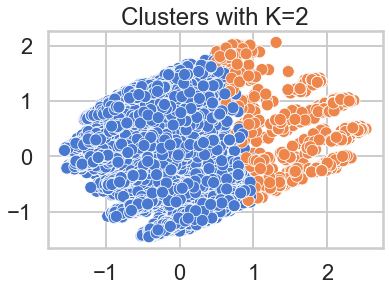

In [23]:
# plot k=4 clusters
sns.scatterplot(df_pca['x'].values,df_pca['y'].values , hue=df_pca['k_2'], legend=False, palette=sns.color_palette('muted')[0:2])
plt.title('Clusters with K=2')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

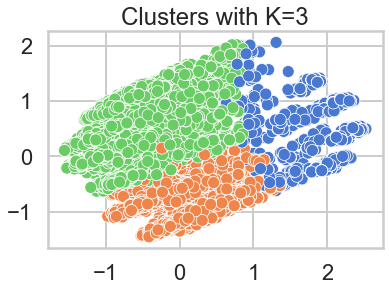

In [24]:
# plot k=4 clusters
sns.scatterplot(df_pca['x'].values,df_pca['y'].values , hue=df_pca['k_3'], legend=False, palette=sns.color_palette('muted')[0:3])
plt.title('Clusters with K=3')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

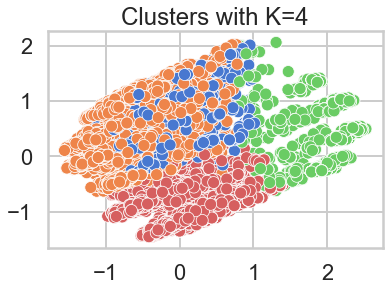

In [25]:
# plot k=4 clusters
sns.scatterplot(df_pca['x'].values,df_pca['y'].values , hue=df_pca['k_4'], legend=False, palette=sns.color_palette('muted')[0:4])
plt.title('Clusters with K=4')
plt.show()

K=2 clustering shows a better clustering with little or no overlap compared to k=3, k=5 and k=4, as we increase k, the overlap seem to be higher and there is no clear cluster distinction. 

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

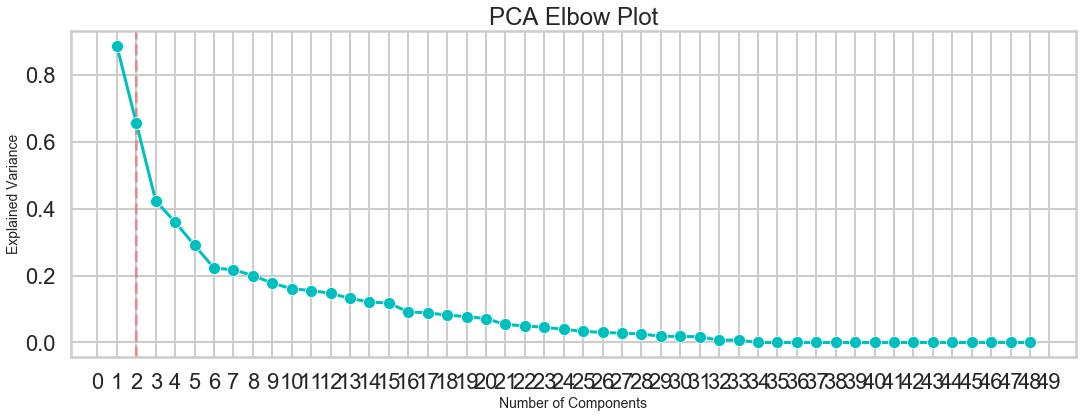

In [32]:
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)


plt.figure(figsize=(18,6))
plt.title("PCA Elbow Plot")
plt.xlabel('Number of Components', size=14)
plt.ylabel('Explained Variance', size=14)
plt.axvline(2, linestyle='--', color='red', alpha=0.3)
ax = sns.lineplot(range(1,len(pca.explained_variance_)+1), pca.explained_variance_, marker="o", color='c')
ax.set_xticks(np.arange(0, 50, step=1));

In [13]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x_cols)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(x_cols)

In terms of evaluating accuracy, k-means is not a classification tool, thus analyzing accuracy is not a very good idea. It is supposed to find a grouping of data which maximizes between-clusters distances, it does not use labeling to train. We could try clustering evaluation metrics such as RandIndex. 

### Calculating the silhouette coefficient and the CH score

In [41]:
from sklearn import metrics

print('Silhouette coefficient: {}'.format(sc))
print('CH Score: {}'.format(ch))

for k in range(2, 21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x_cols)
    labels = kmeans_model.labels_
    print('Silhouette coefficient: ', k, metrics.silhouette_score(x_cols, labels, metric = 'euclidean'))
    print('CH Score: ' , k, metrics.calinski_harabaz_score(x_cols, labels))

Silhouette coefficient: 0.1628236349614095
CH Score: 9926.089702910549
Silhouette coefficient:  2 0.19768353180348036
CH Score:  2 9772.92803153892
Silhouette coefficient:  3 0.1628236349614095
CH Score:  3 9926.089702910549
Silhouette coefficient:  4 0.15441480849070535
CH Score:  4 8449.841055913113
Silhouette coefficient:  5 0.1463578667964137
CH Score:  5 7340.367632040656
Silhouette coefficient:  6 0.14543688349256428
CH Score:  6 6748.504422377157
Silhouette coefficient:  7 0.14792801784533052
CH Score:  7 6115.989886259174
Silhouette coefficient:  8 0.14230741957957385
CH Score:  8 5630.439971937276
Silhouette coefficient:  9 0.14034964971298972
CH Score:  9 5242.510318064228
Silhouette coefficient:  10 0.13453751720850643
CH Score:  10 5038.922551230098
Silhouette coefficient:  11 0.13081125407392924
CH Score:  11 4683.815020190192
Silhouette coefficient:  12 0.13624480030586017
CH Score:  12 4431.806945380373
Silhouette coefficient:  13 0.13556140612052986
CH Score:  13 4309.8

The silhouette of a point measures how similar a point is to its cluster versus the next closest cluster. This is a ratio of the distances to the cluster centers, normalized so that "1" is a perfect match to its cluster and "-1" a perfect mismatch.

The silhouette of a cluster is the average silhouette of all of its members. What this means is practice is that a larger number means that the cluster is "separated" from its other clusters.

Silhouettes are  measuring the density of points along the boundary of a cluster. When the silhouette is high, then the boundary has very few points. That is what you want -- well separated clusters.

When using k-means, small "outlier" clusters would typically have large silhouettes. Often the larger clusters have dense boundaries.